In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import sys
sys.path.append('../')

In [23]:
import src.read_raw as rr

In [54]:
import os
import yaml
with open('../config.local','rb') as cf:
    config = yaml.load(cf)
tempbase = config['data_path']
pathbase = 'maven/data/sci/ngi/l2/'
base = os.path.expanduser(tempbase+pathbase)


/Users/masl3485/Desktop/MCS/data/raw/maven/data/sci/ngi/l2/2015/03/


In [55]:
test = base + '2015/03/mvn_ngi_l2_csn-abund-15118_20150301T035951_v07_r01.csv'
data = pd.read_csv(test)

In [56]:
data = data[(data['species']=='Ar')&(data['alt']<250)]
data = rr.IO_orb(data)

In [57]:
def horizd(latdiff,longdiff):
    Rmars = 3396.
    return np.sqrt(Rmars**2 * ((np.abs(latdiff)*np.pi/180.)**2 + (np.abs(longdiff)*np.pi/180)**2 ) )

In [66]:
hd = horizd(data['lat'].max()-data['lat'].min(),data['long'].max()-data['long'].min())
print hd

1366.83877656


In [67]:
bottom = data[data['alt']<data['alt'].min()+2]
bt_hd = horizd(bottom['lat'].max()-bottom['lat'].min(),bottom['long'].max()-bottom['long'].min())
print bt_hd

197.462677082


In [68]:
nb = data[(data['alt']>data['alt'].min()+2) & (data['alt']<data['alt'].min()+10)]
nb_hd = horizd(nb['lat'].max()-nb['lat'].min(),nb['long'].max()-nb['long'].min())
print nb_hd

240.404502325


In [69]:
top = data[data['alt']<200]
tp_hd = horizd(top['lat'].max()-top['lat'].min(),top['long'].max()-top['long'].min())
print tp_hd

951.352367215


In [73]:
print bt_hd/tp_hd
print bt_hd/hd

0.207559978707
0.144466692392


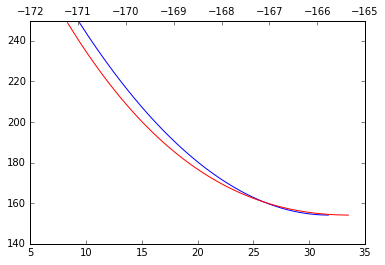

In [62]:
plt.plot(data['lat'],data['alt'],'b')
plt.twiny()
plt.plot(data['long'],data['alt'],'r')

plt.ylim(140,250)

plt.show()

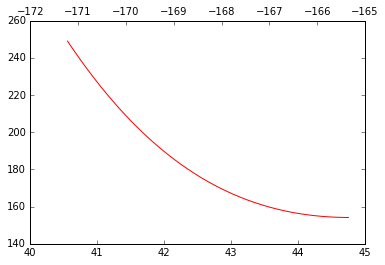

In [64]:
plt.plot(data['lat'],data['alt'],'b')
plt.twiny()
plt.plot(data['long'],data['alt'],'r')


plt.show()

In [52]:
print 5.4*np.exp(1)

14.6787218737


In [72]:
np.sqrt(1500**2 + 200**2)

1513.2745950421556